**Impact of Training and Test datasets**

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [9]:
score = clf.score(iris.data, iris.target)
print("Classifier score is "+str(score*100)+"%!")

Classifier score is 100.0%!


Now Split the datset into training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

In [11]:
 clf = clf.fit(X_train, y_train)
 score = clf.score(X_test, y_test)
 print("Classifier score is actually "+ str(score*100)+"%.")

Classifier score is actually 92.10526315789474%.


**XGBoost**

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
y_pred = model.predict(X_test)
predictions = [round(prediction) for prediction in y_pred]

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print( "Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 86.67%


**Natural Language Processing (NLP) **


Tf-Idf : term frequency, inverse document frequency

In [22]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [23]:
newsgroups_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [24]:
newsgroups_train.target[0]

7

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2)
my_tfidfvectorizer = TfidfVectorizer(input='content', ngram_range=ngram_range)
X_train_transformed = my_tfidfvectorizer.fit_transform(newsgroups_train.data)

In [27]:
X_train_transformed

<11314x1181803 sparse matrix of type '<class 'numpy.float64'>'
	with 4696188 stored elements in Compressed Sparse Row format>

In [28]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train_transformed, newsgroups_train.target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [1]:
clf.score(X_train_transformed, newsgroups_train.target)

NameError: name 'clf' is not defined

In [ ]:
X_test_transformed = my_tfidfvectorizer.transforms(newsgroups_test.data)

In [ ]:
clf.score(X_test_transformed, newsgroups_test.target)

**Isolation Forest -> Anomaly detection**

In [10]:
import numpy as np
rng = np.random.RandomState(42)
nNormal = 2000
nAnomalous = 200
X_normal = np.r_[0.5* rng.randn(int(nNormal/2), 2), 0.5*rng.randn(int(nNormal/2), 2)]
y_normal = nNormal*[0]
X_anomalous = rng.uniform( low=-5, high=5, size=(nAnomalous, 2))
y_anomalous = nAnomalous*[1]

In [11]:
print(X_normal.shape)
print(X_normal[0:5])

(2000, 2)
[[ 0.24835708 -0.06913215]
 [ 0.32384427  0.76151493]
 [-0.11707669 -0.11706848]
 [ 0.78960641  0.38371736]
 [-0.23473719  0.27128002]]


In [12]:
print(X_anomalous.shape)
print(X_anomalous[0:5])

(200, 2)
[[-0.14982012 -4.1459697 ]
 [ 4.7246139   0.18010431]
 [ 1.14186244 -2.63390217]
 [-0.16501915 -0.70850508]
 [-4.25104158 -3.93839646]]


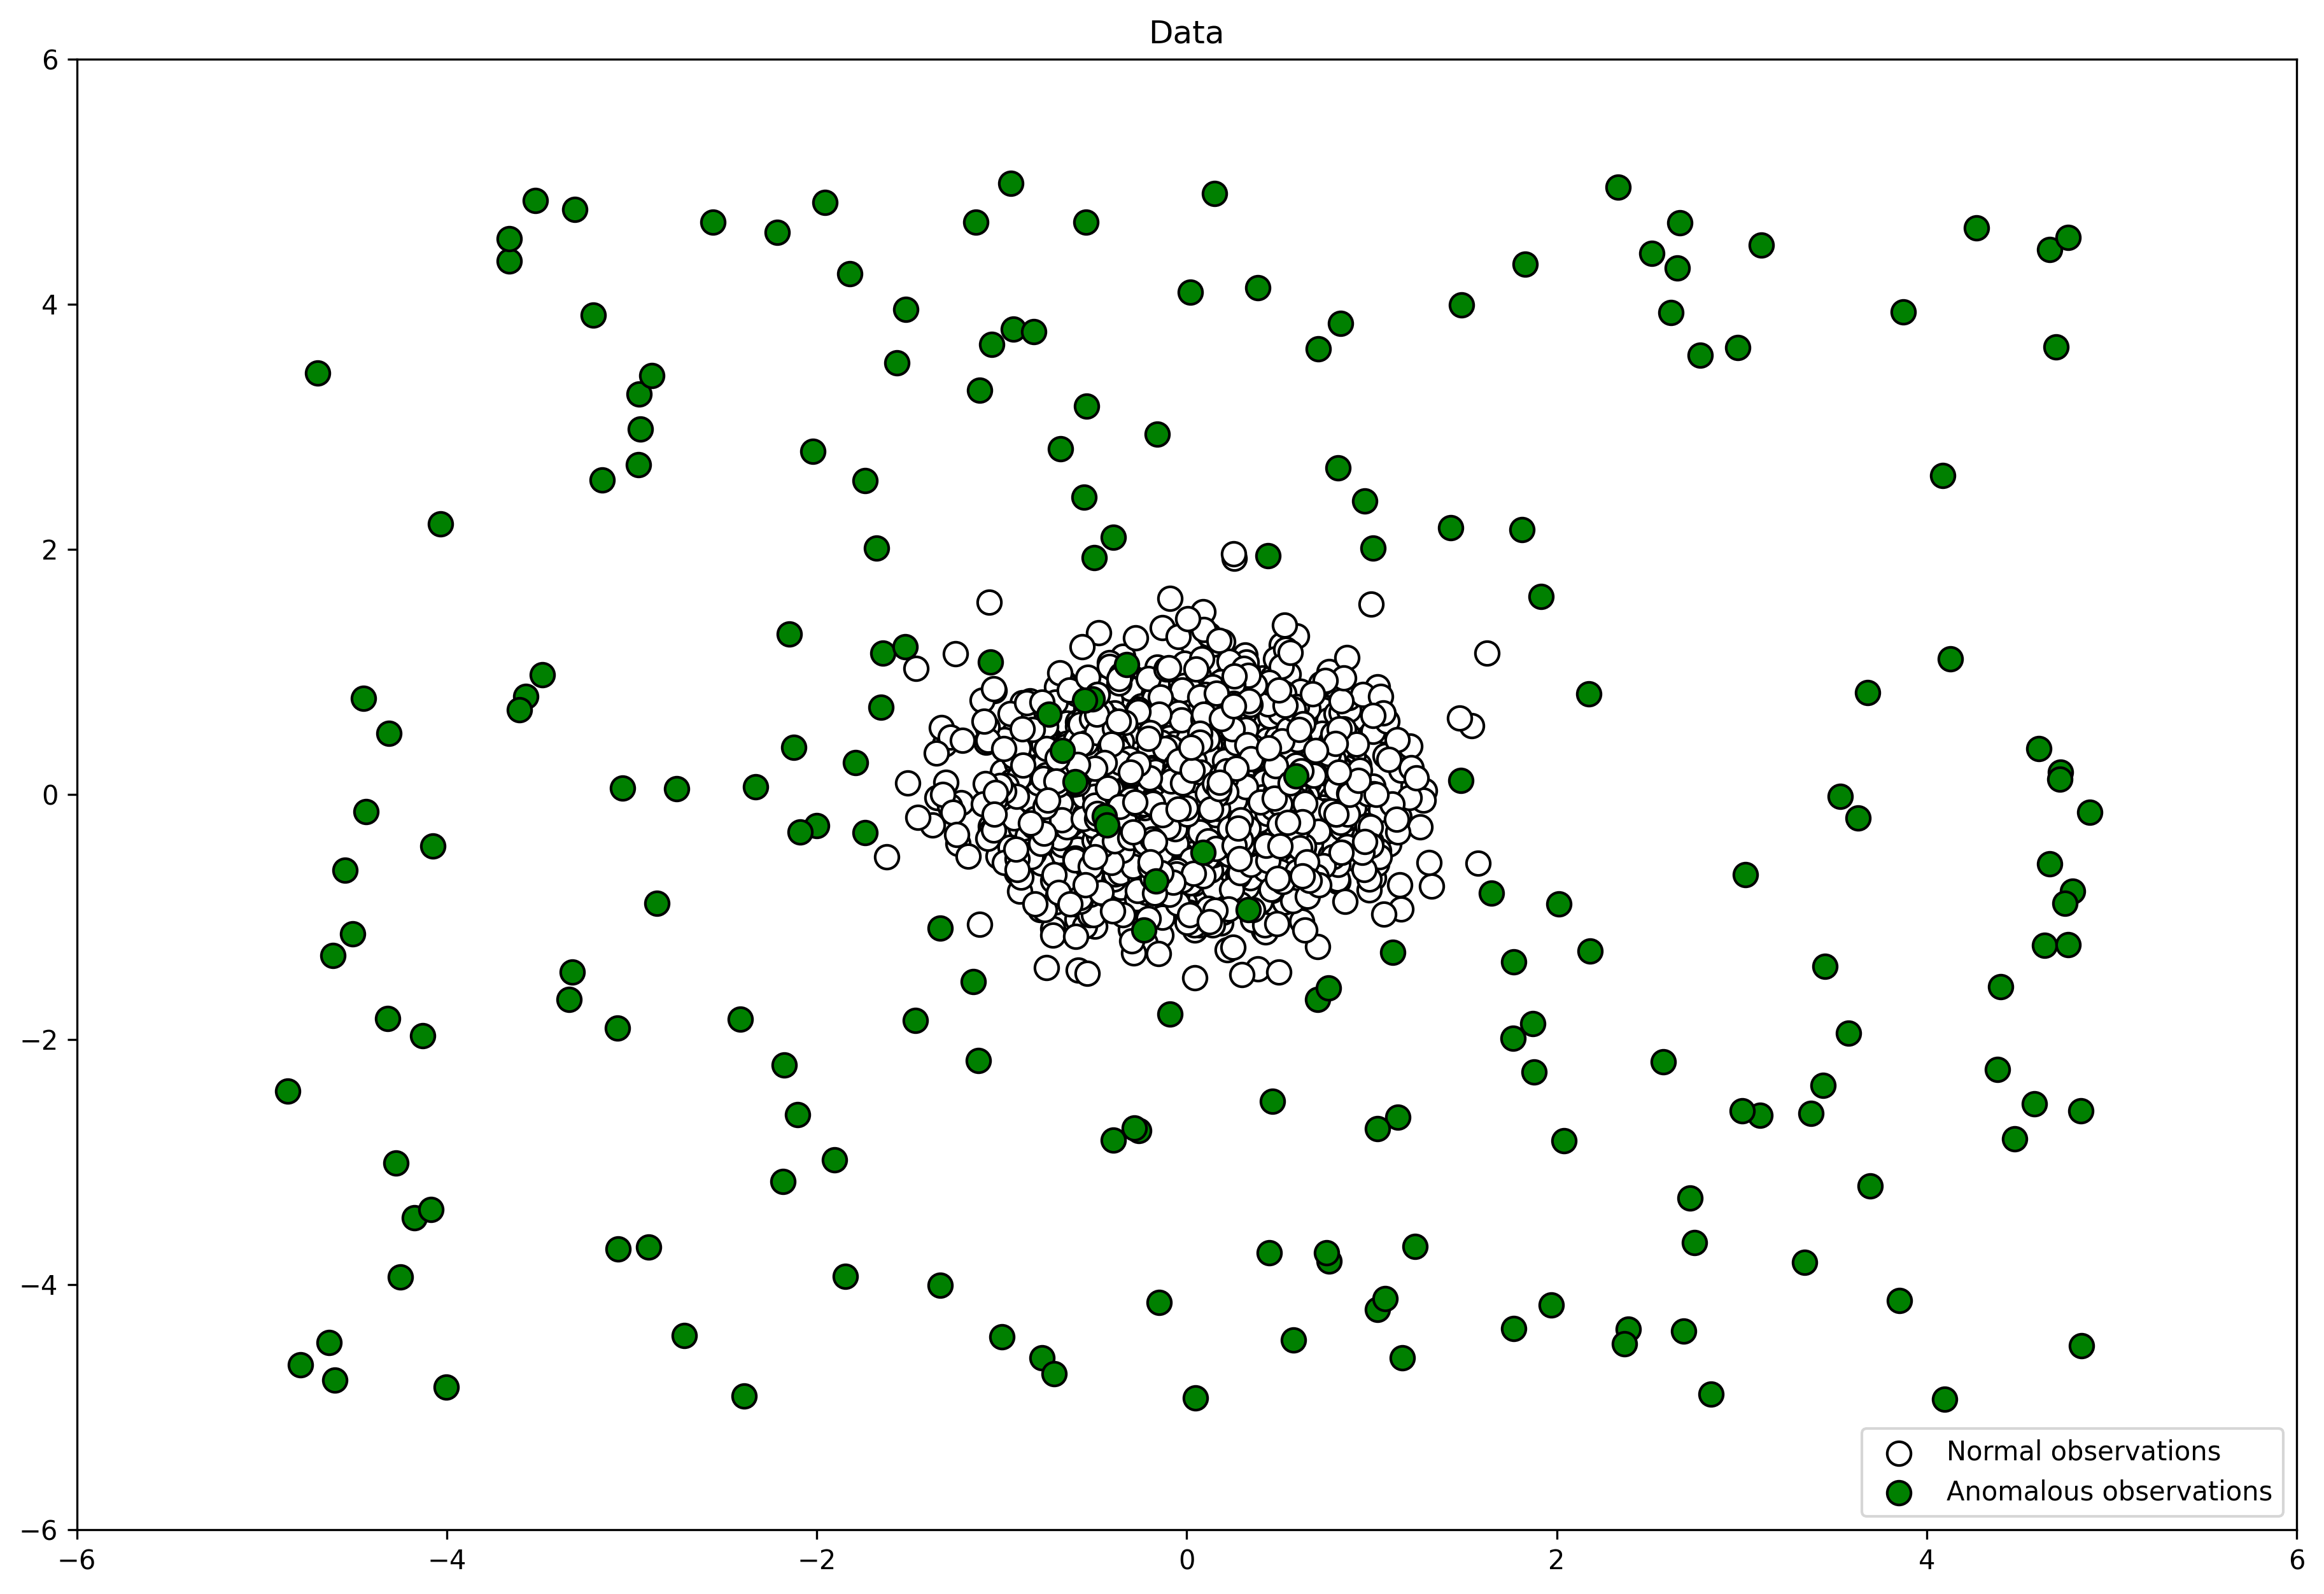

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] =[15, 10]
plt.title("Data")

p1=plt.scatter(X_normal[:,0], X_normal[:,1], c='white', s=20*4, edgecolor='k')
p2=plt.scatter(X_anomalous[:,0], X_anomalous[:,1], c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2],
           ["Normal observations",
            "Anomalous observations"],
           loc="lower right")

plt.show()


In [14]:
from sklearn.model_selection import train_test_split
X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(X_normal, y_normal, test_size=0.2)
X_anomalous_train, X_anomalous_test, y_anomalous_train, y_anomalous_test = train_test_split(X_anomalous, y_anomalous, test_size=0.2)
X_train = np.concatenate([X_normal_train, X_anomalous_train])
y_train = np.concatenate([y_normal_train, y_anomalous_train])
X_test = np.concatenate([X_normal_test, X_anomalous_test])
y_test = np.concatenate([y_normal_test, y_anomalous_test])


In [15]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(X_train)

IsolationForest()

Text(0.5, 1.0, 'Distribution of anomaly scores for training normal set')

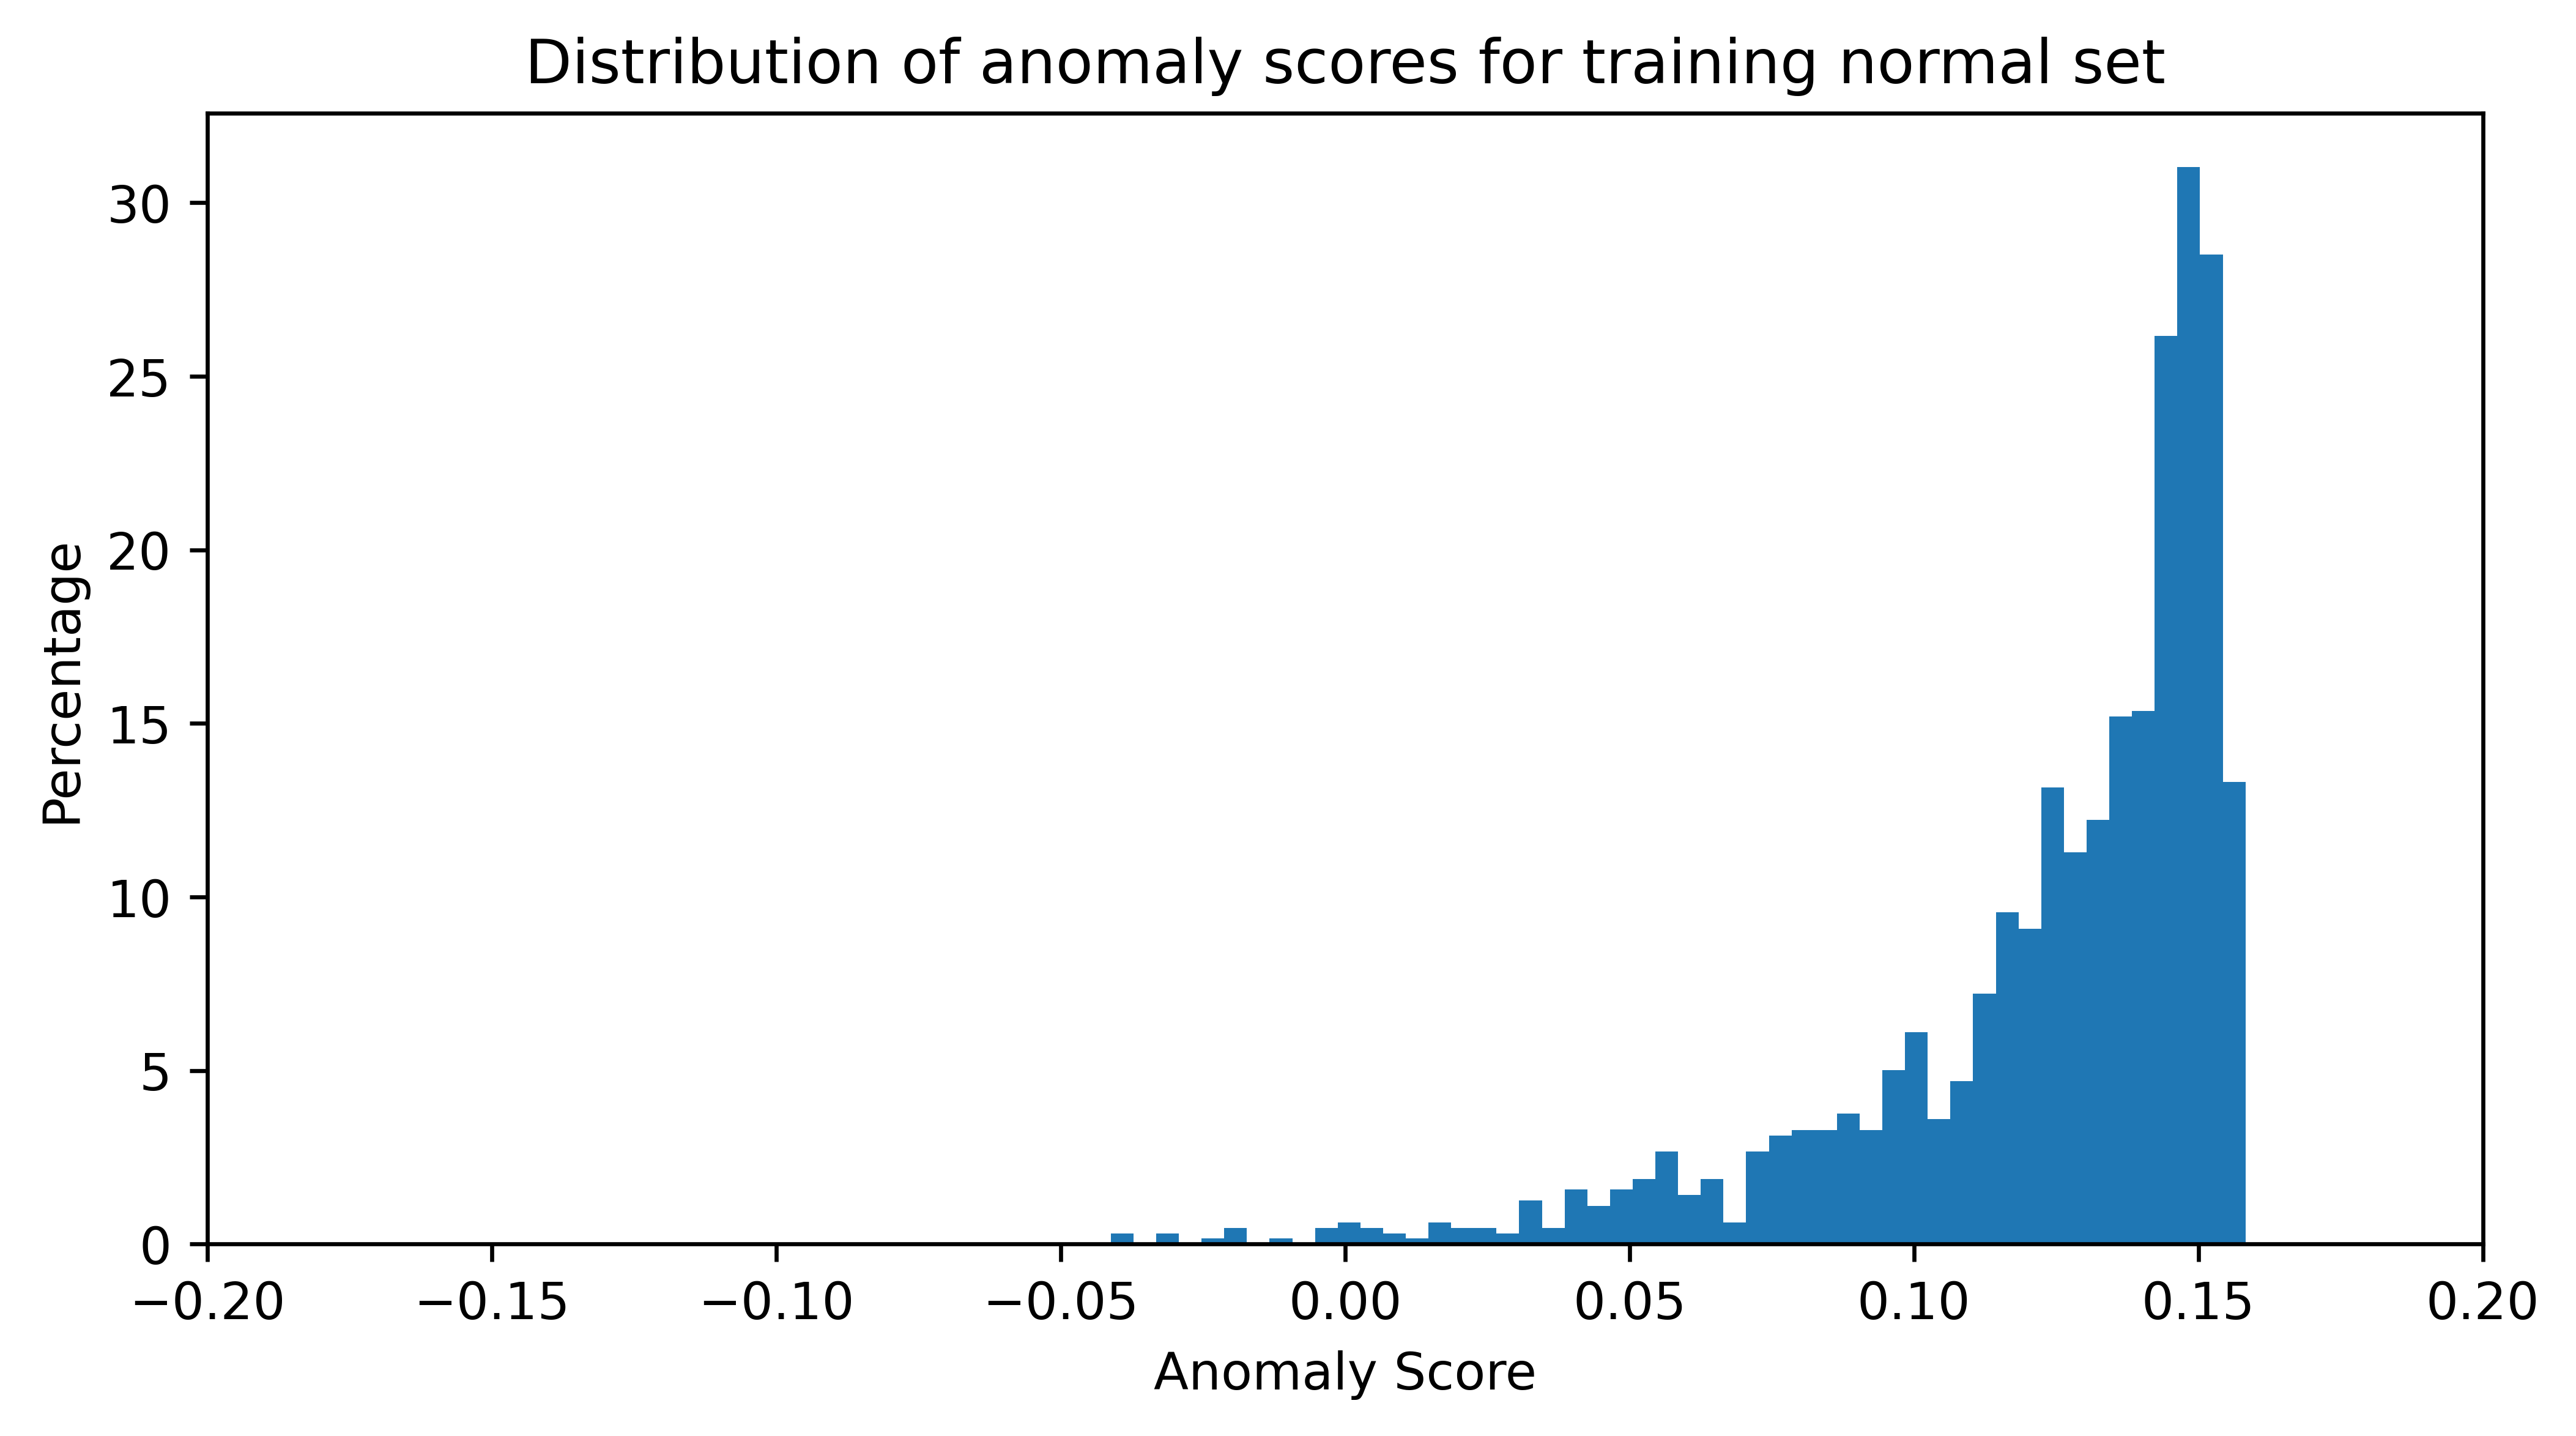

In [17]:
train_scores = clf.decision_function(X_normal_train)
fig = plt.figure(figsize=(8, 4), dpi=600, facecolor='w', edgecolor='k')
normal = plt.hist(train_scores, 50, density=True)
plt.xlim(-0.2,0.2)
plt.xlabel('Anomaly Score')
plt.ylabel('Percentage')
plt.title("Distribution of anomaly scores for training normal set")

Text(0.5, 1.0, 'Distribution of anomaly scores for training anomalous set')

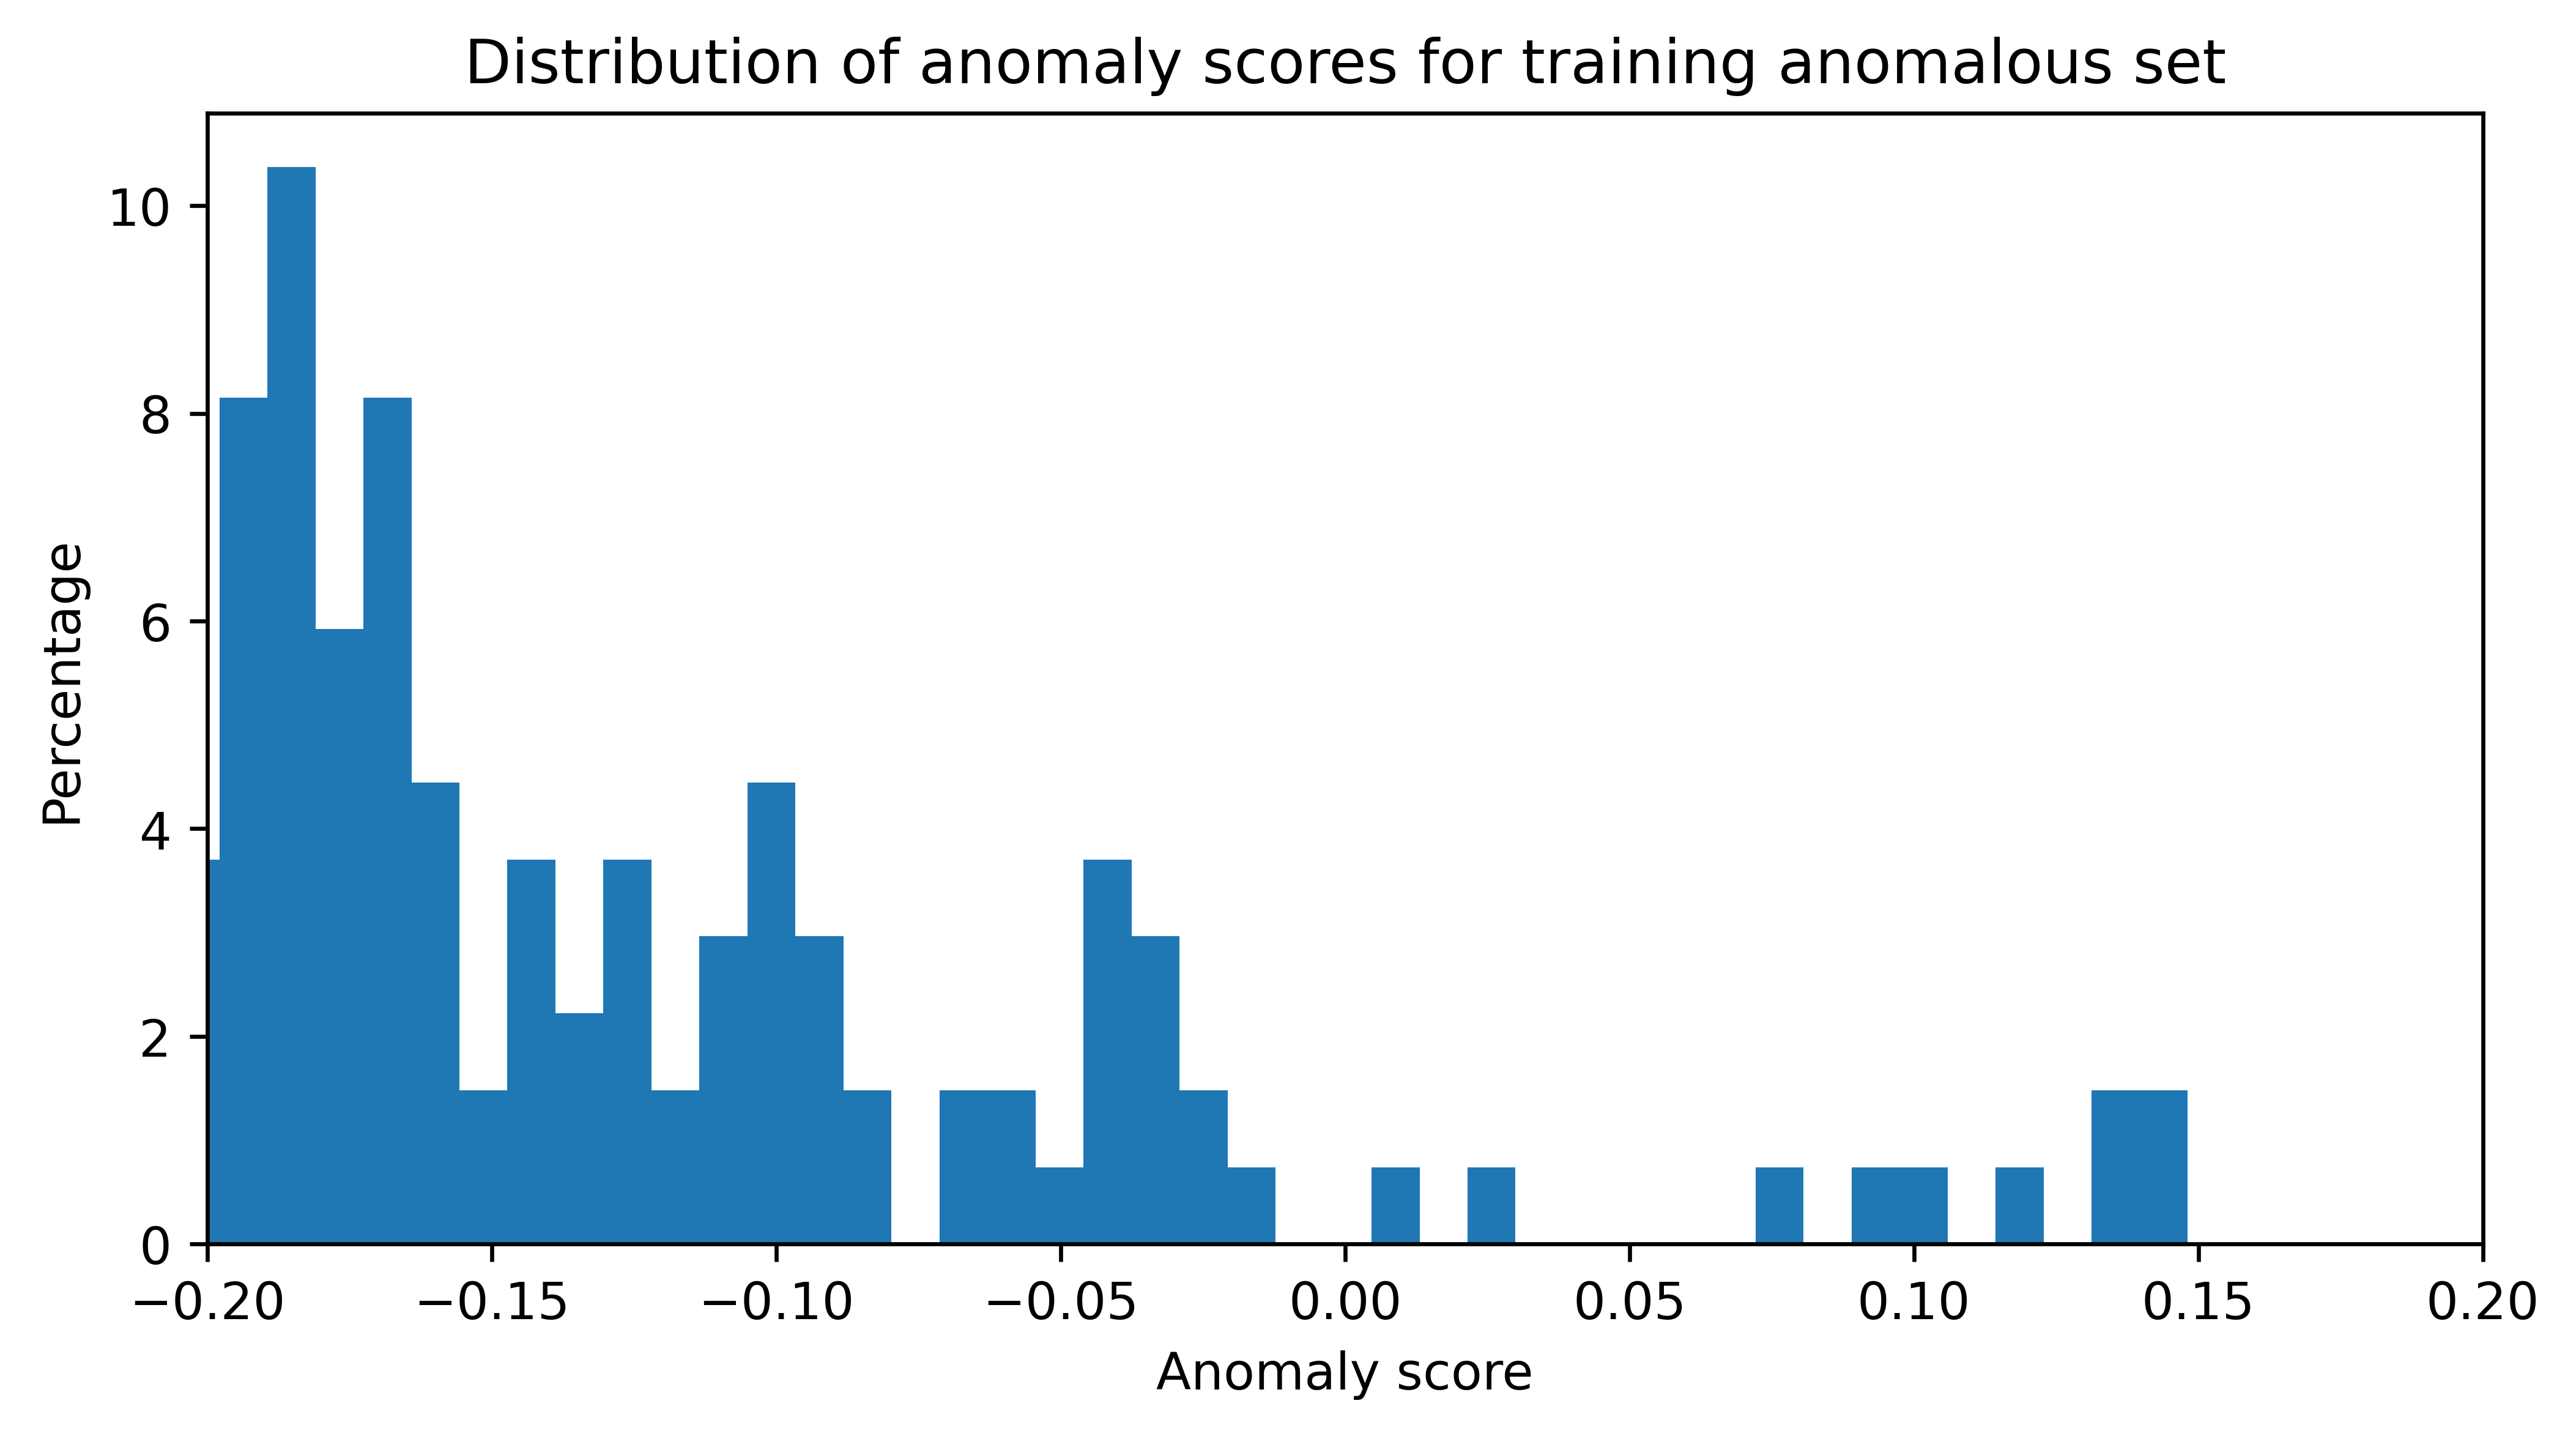

In [19]:
train_scores= clf.decision_function(X_anomalous_train)
fig = plt.figure(figsize=(8, 4), dpi=600, facecolor='w', edgecolor='k')
normal = plt.hist(train_scores, 50, density=True)
plt.xlim(-0.2, 0.2)
plt.xlabel("Anomaly score")
plt.ylabel("Percentage")
plt.title("Distribution of anomaly scores for training anomalous set")

In [20]:
cutoff=0.01

In [21]:
def FPR(y_true, y_pred):
  TotalNegatives = sum(y_true==0)
  FP = sum(y_pred[y_true==0]==1)
  return str(float(FP)/float(TotalNegatives)*100)+"%"
def TPR(y_true, y_pred):
  TotalPositives = sum(y_true==1)
  TP = sum(y_pred[y_true==1]==1)
  return str(float(TP)/float(TotalPositives)*100)+"%"

In [22]:
print(TPR(y_train, (cutoff>clf.decision_function(X_train)).astype(int)))
print(FPR(y_train, (cutoff>clf.decision_function(X_train)).astype(int)))

93.75%
1.25%


In [23]:
print(TPR(y_test, (cutoff>clf.decision_function(X_test)).astype(int)))
print(FPR(y_test, (cutoff>clf.decision_function(X_test)).astype(int)))

87.5%
1.25%


**Hyper Parameter Tuning**

**Bayesian Search**

In [57]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [58]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [59]:
 pip install scikit-optimize

In [60]:
from skopt import BayesSearchCV
num_iterations = 100

In [61]:
!pip install xgboost

In [62]:
import xgboost as xgb
estimator = xgb.XGBClassifier(
    n_jobs = -1,
    objective = 'multi:softmax',
    eval_metric = 'merror',
    verbosity=0,
    num_class=len(set(y))
)

In [63]:
search_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'min_child_weight': (0, 10),
    'max_depth': (1, 50),
    'max_delta_step': (0, 10),
    'subsample': (0.01, 1.0, 'log-uniform'),
    'colsample_bytree': (0.01, 1.0, 'log-uniform'),
    'colsample_bylevel': (0.01, 1.0, 'log-uniform'),
    'reg_lambda': (1e-9, 1000, 'log-uniform'),
    'reg_alpha': (1e-9, 1.0, 'log-uniform'),
    'gamma': (1e-9, 0.5, 'log-uniform'),
    'min_child_weight': (0, 5),
    'n_estimators': (5, 5000),
    'scale_pos_weight': (1e-6, 500, 'log-uniform')

}

In [65]:
from sklearn.model_selection import StratifiedGroupKFold
crossvalidation = StratifiedGroupKFold(
    n_splits=5, shuffle=True
)

In [66]:
bayes_cv_tuner = BayesSearchCV(estimator=estimator,
                               search_spaces=search_space,
                               scoring='accuracy',
                               cv=crossvalidation,
                               n_jobs=-1,
                               n_iter=num_iterations,
                               verbose=0,
                               refit=True)

In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, roc_auc_score
def print_status(optim_result):
  models_tested = pd.DataFrame(bayes_cv_tuner.cv_results_)
  best_paramas_so_far = pd.Series(bayes_cv_tuner.best_params_)
  print('Model #{} \n Best accuracy so far:{}\n Best parameters so far: {}\n'.format(
      len(models_tested),
      np.round(bayes_cv_tuner.best_score_, 4),
      bayes_cv_tuner.best_params_
  ))
  clf_type = bayes_cv_tuner.estimator.__class__.__name__
  models_tested.to_csv(clf_type+"_cv_results.csv")

In [74]:
print(bayes_cv_tuner)

BayesSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='merror', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      im...
                             'colsample_bytree': (0.01, 1.0, 'log-uniform'),
                             'gamma': (1e-09, 0.5, 'log-uniform'),
                             'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_delta_step': (0, 10), 'max_depth': (1, 50),
                

In [71]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [75]:
results = bayes_cv_tuner.fit(X, y, callback=print_status)

ValueError: attempt to get argmax of an empty sequence

**Markov Chain**

In [77]:
!pip install markovify

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18608 sha256=b2dea8cd1b15b715d6799bc09c19a5594d8113e0eaad1e79e056f4140d8ee1dd
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [78]:
import markovify

In [ ]:
with open("../") as f:
  text = f.read

In [ ]:
print(text)

In [ ]:
text_model = markovify.Text(text)

In [ ]:
for i in range(5):
  print(text_model.make_sentence())

In [ ]:
for i in range(3):
  print(text_model.make_short_sentence(140))